# **Kruskal-Wallis Test**
#### **Study the origin of each group in your data**

## **1. What is the test telling?**
The Kruskal-Wallis test is a non-parametric method for testing whether samples originate from the same distribution. It's often seen as the non-parametric alternative to the one-way ANOVA. which I might dedicate another guide to it.

### **Formal definition**

Let $k$ be an arbitrary number of groups and $\{x_{1,1},\dots,x_{1,n_1}\},\dots,\{x_{k,1},\dots,x_{k,n_k}\}$ the associated sample with the 1st,..., $k$-th group respectively (all of them continuous and independent). We order the $n=n_1+\cdots+n_k$ observations and assign a rank depending on their positions (1 the lowest possible, $n$ the highest possible). Let $R_1,\dots,R_k$ the sum of ranks for all the observations depending on their group.

The aim of the Kruskal-Wallis test is to the determine whether
$$ H_0:\text{All the } k \text{ samples come from the same distribution} $$
$$ \text{vs} $$
$$ H_1:\text{Not all the } k \text{ samples come from the same distribution} $$

If you are not familiar with the coming notation or with hypothesis tests, I would highly recommend you to check this other [guide for chi-square test](https://www.linkedin.com/feed/update/urn:li:activity:7369022608576622592?utm_source=share&utm_medium=member_desktop&rcm=ACoAAFgPA70BRK5510H_8uDQmRtSasGuzVq97Pw) where I explain them in more detail before reading the rest of this section.

To do so, we set a significance level $\alpha$ (usual values are 0.95, 0.975 and 0.99) and compute the associated statistic with this test:
$$h = \frac{12}{n(n+1)} \sum_{i=1}^{k} \frac{R_{i}^{2}}{n_{i}} - 3(n+1)$$

If we think of $h$ as a random variable, $H$, it can be proved (despite being beyond the scope of this guide) that
$$H\overset{\mathcal{L}}{\longrightarrow}\chi^2_{(k-1)},\text{ when }n\rightarrow\infty$$

Thus, we can only reject $H_0$ if $h>c_{\alpha,k-1}$, where $c_{\alpha,k-1}$ is the (critical) value such that $P(\chi^2_{(k-1)}>c_{\alpha,k-1})=\alpha$. Equivalently, we can only reject $H_0$ if the associated p-value $<\alpha$.

### **A toy example**

For instance, imagine a researcher wants to know if the background music genre affects the time it takes for people to solve a complex puzzle. They randomly assign 15 participants to one of three groups:

- **Group 1 (Classical):** Solves the puzzle with classical music playing.

- **Group 2 (Rock):** Solves the puzzle with rock music playing.

- **Group 3 (Silence):** Solves the puzzle in silence.

The time taken to solve the puzzle (in minutes) is recorded.

#### **Step 1: The data**

- **Classical:** $\{15, 17, 22, 19, 12\}\rightarrow n_1 = 5$
- **Rock:** $\{20, 25, 30, 28, 22\}\rightarrow n_2 = 5$
- **Silence:** $\{18, 12, 10, 14, 11\}\rightarrow n_3 = 5$

Thus the total number of observations is $n_1+n_2+n_3=15$.

#### **Step 2: State the hypotheses**

- **Null Hypothesis** ($H_0$): There is *no difference* in the median solving times between the three music genre groups. The music genre does not affect performance.

- **Alternative Hypothesis** ($H_1$): There is *a difference* in the median solving times between at least two of the groups.

#### **Step 3: Rank all the data**

We combine all data from all groups, order it from smallest to largest, and assign ranks. If there are ties, we assign the average rank.

**Ordered Data (Time):** 10, 11, 12, 12, 14, 15, 17, 18, 19, 20, 22, 22, 25, 28, 30

| Time | Group     | Rank |
|------|-----------|------|
| 10   | Silence   | 1    |
| 11   | Silence   | 2    |
| 12   | Silence   | 3.5  |
| 12   | Classical | 3.5  |
| 14   | Silence   | 5    |
| 15   | Classical | 6    |
| 17   | Classical | 7    |
| 18   | Silence   | 8    |
| 19   | Classical | 9    |
| 20   | Rock      | 10   |
| 22   | Classical | 11.5 |
| 22   | Rock      | 11.5 |
| 25   | Rock      | 13   |
| 28   | Rock      | 14   |
| 30   | Rock      | 15   |

Notice we got ties for values 12 and 22. In these cases, we compute the mean of the supposed ranks: $\frac{3+4}{2}$ and $\frac{11+12}{2}$ respectively.

#### **Step 4: Sum the ranks for each group**

- $R_1$ *(Classical):* 3.5 + 6 + 7 + 9 + 11.5 = 37

- $R_2$ *(Rock):* 10 + 11.5 + 13 + 14 + 15 = 63.5

- $R_3$ *(Silence):* 1 + 2 + 3.5 + 5 + 8 = 19.5

#### **Step 5: Calculate the $H$ statistic**

$$h = \frac{12}{n(n+1)} \left( \frac{R_1^2}{n_1} + \frac{R_2^2}{n_2} + \frac{R_3^2}{n_3} \right) - 3(n+1)=9.815$$

#### **Step 6: Interpret the result**
In this case, the $H$ statistic follows a Chi-square distribution. Because $k=3$ is the number of groups (classical, rock and silence), the degrees of freedom of the chi-square distribution are $k-1=2$.

The critical value for $\chi^2_{(2)}$ and a significance level of $\alpha=0.05$ is 5.991. Because this number is below 9.815, we **reject the null hypothesis**.


## **2. When to prefer the Kruskal-Wallis test**

You would run the Kruskal-Wallis test in the following scenarios:

### **a) To objectively confirm visual patterns**

Imagine a cloud provider wants to test the performance of its service. They measure the load time (in milliseconds) of a standard webpage hosted on servers in four different geographical regions: North America, Europe, Asia and South America.

We start by creating the data using Python:

In [1]:
# Import the dependencies we will need throughout this guide
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

In [2]:
# Set a seed for reproducibility
np.random.seed(42)  # The answer to everything

# Number of samples per region
n_samples = 250
regions = ['North_America', 'Europe', 'Asia', 'South_America']

# We will create data for each region with different underlying distributions
# We'll use the lognormal distribution to create realistic, right-skewed load times.

data = []
for region in regions:
    if region == 'North_America':
        # Fast and consistent
        load_time = np.random.lognormal(mean=5.2, sigma=0.15, size=n_samples)
    elif region == 'Europe':
        # Slightly slower and more variable than NA
        load_time = np.random.lognormal(mean=5.3, sigma=0.2, size=n_samples)
    elif region == 'Asia':
        # Noticeably slower, high variance
        load_time = np.random.lognormal(mean=5.5, sigma=0.25, size=n_samples)
    elif region == 'South_America':
        # Slowest, but slightly less variable than Asia
        load_time = np.random.lognormal(mean=5.4, sigma=0.30, size=n_samples)

    # Create a DataFrame for this region and append it to the list
    df_region = pd.DataFrame({
        'Server_Region': region,
        'Load_Time_ms': load_time
    })
    data.append(df_region)

# Combine all regional DataFrames into one
df = pd.concat(data, ignore_index=True)


In [3]:
df.sample(10)

,Server_Region,Load_Time_ms
541,Asia,184.485946
466,Europe,226.520022
181,North_America,159.401530
332,Europe,203.397239
40,North_America,202.506095
890,South_America,283.197534
80,North_America,175.396516
198,North_America,182.861915
505,Asia,216.636028
586,Asia,218.144955


A boxplot is the ideal visualization to motivate this scenario.

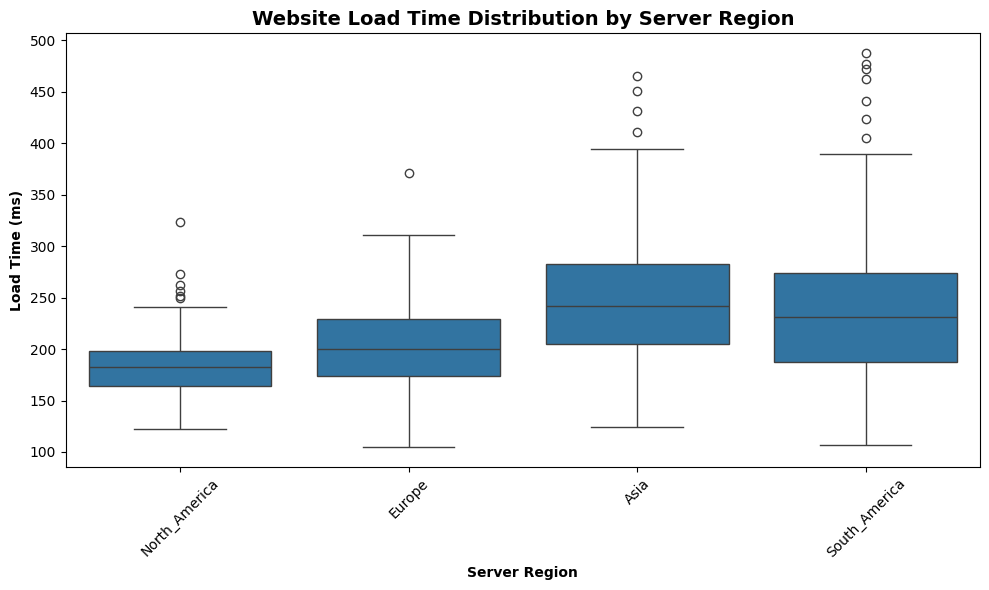

In [4]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Server_Region', y='Load_Time_ms')
plt.title('Website Load Time Distribution by Server Region', fontsize=14, fontweight='bold')
plt.xlabel('Server Region', fontweight='bold')
plt.ylabel('Load Time (ms)', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Both the medians (lines inside the boxes)  and the variance (size of the boxes and whiskers) are different for each region. Asia and South America have wider distributions.

The plot suggests a difference, but we need to know if it's statistically significant or could just be random variation. This is when the Kruskal-Wallis test comes to action:

In [5]:
# Prepare data for the test: split the numerical variable by group
grouped_data = [group['Load_Time_ms'].values for name, group in df.groupby('Server_Region')]

# Perform the Kruskal-Wallis test
h_statistic, p_value = kruskal(*grouped_data)
h_statistic, p_value

(np.float64(211.67122103496513), np.float64(1.2676131268976922e-45))

Since the p-value is practically 0, we can reject the null hypothesis $H_0$ of the data coming from the same distribution at any signifance level $\alpha$.

### **b) When the data violates the assumptions of ANOVA**

This is a primary technical reason. The one-way ANOVA requires:

- Normally distributed data within each group.

- Homogeneity of variances (similar spread across groups).

The Kruskal-Wallis test does **not** require these assumptions. It's based on data ranks, making it robust to outliers and non-normal distributions.

In our previous example, the data was non-normal (right-skewed), which violated the ANOVA assumption but was perfectly handled by Kruskal-Wallis:

<function matplotlib.pyplot.show(close=None, block=None)>

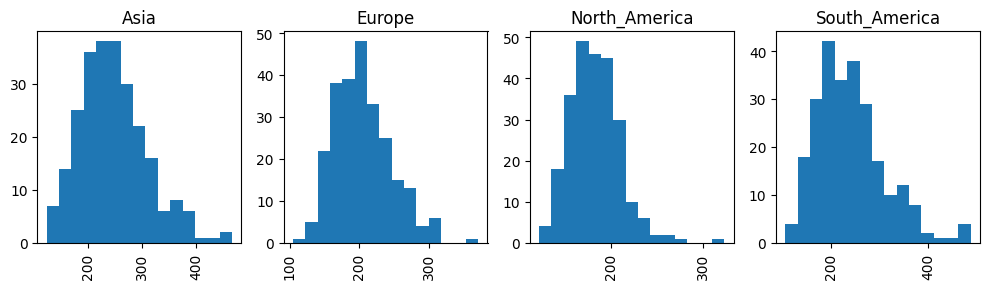

In [23]:
df.hist(column='Load_Time_ms', by='Server_Region', bins=15, layout=(1,4), figsize=(10,3))
plt.tight_layout()
plt.show

### **c) When Dealing with Ordinal Data**

The Kruskal-Wallis test is ideal for ordinal data. For example, a retail chain wants to compare customer satisfaction at three of its store locations.

- **Independent Variable (Categorical - Groups):** `Store_Location`

    - `Store_A`

    - `Store_B` 

    - `Store_C`

- **Dependent Variable (Ordinal - Rating):** `Satisfaction_Rating`

    - 1 - Very Dissatisfied

    - 2 - Dissatisfied

    - 3 - Neutral

    - 4 - Satisfied

    - 5 - Very Satisfied

I will design the data so that the distributions of ratings are different for each store, implying different median levels of satisfaction.

In [7]:
# Set a seed for reproducibility
np.random.seed(7) # Chosen to create a clear example

# Total number of customers surveyed
n_customers = 1000

# Define the store names and rating scale
stores = ['Store_A', 'Store_B', 'Store_C']
ratings = [1, 2, 3, 4, 5]
rating_labels = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']

# Create a list to hold our data
data = []

# Define the probability distribution for each store's ratings.
# This is where we invent the story.

probabilities = {
    'Store_A': [0.05, 0.10, 0.15, 0.40, 0.30],  # Most customers are Satisfied/Very Satisfied
    'Store_B': [0.10, 0.20, 0.40, 0.20, 0.10],  # The majority are Neutral
    'Store_C': [0.25, 0.25, 0.25, 0.15, 0.10]   # Ratings are spread out, leaning negative
}

# Generate the data for each store
for store in stores:
    # Generate the ratings for this store based on its probability distribution
    store_ratings = np.random.choice(ratings, size=n_customers // len(stores), p=probabilities[store])
    
    # Create a DataFrame for this store's data
    for rating in store_ratings:
        data.append({'Store_Location': store, 'Satisfaction_Rating': rating})

# Create the main DataFrame
df2 = pd.DataFrame(data)

In [8]:
df2.sample(10)

,Store_Location,Satisfaction_Rating
2,Store_A,4
970,Store_C,4
526,Store_B,3
811,Store_C,3
904,Store_C,4
86,Store_A,4
936,Store_C,3
5,Store_A,4
423,Store_B,5
345,Store_B,4


The best plot for this example is the 100% stacked bar chart, so we will need the percentage contingency table.

In [9]:
# Create a percentage contingency table for the 100% stacked bar chart
contingency_table = pd.crosstab(df2['Store_Location'], df2['Satisfaction_Rating'])
sum_rows_ct = contingency_table.sum(axis='columns').values
contingency_table_pct = contingency_table.div(sum_rows_ct, axis='index')*100
contingency_table_pct.round(2)

Satisfaction_Rating,1,2,3,4,5
Store_Location,,,,,
Store_A,5.71,11.41,13.21,39.04,30.63
Store_B,10.21,22.52,37.24,18.02,12.01
Store_C,22.82,27.03,25.83,16.52,7.81


<Figure size 1000x600 with 0 Axes>

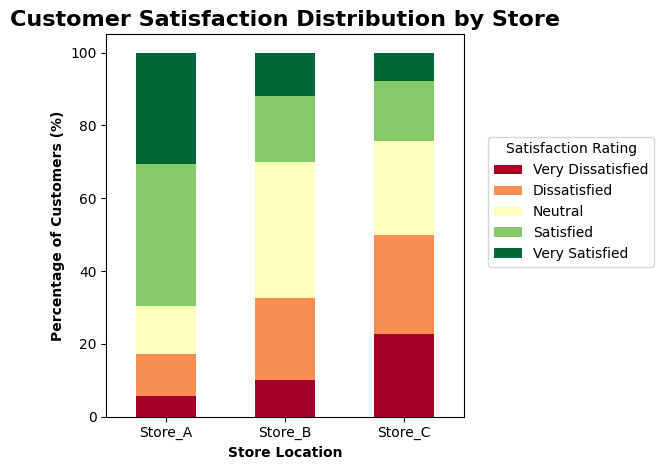

In [10]:
# Plot the 100% stacked bar chart
plt.figure(figsize=(10, 6))
ax = contingency_table_pct.plot.bar(stacked=True, colormap='RdYlGn') # Red-Yellow-Green colormap is intuitive

plt.title('Customer Satisfaction Distribution by Store', fontsize=16, fontweight='bold')
plt.xlabel('Store Location', fontweight='bold')
plt.ylabel('Percentage of Customers (%)', fontweight='bold')
plt.xticks(rotation=0)

# Move the legend and set the title
plt.legend(
    title='Satisfaction Rating',
    labels=rating_labels,
    loc='upper left',
    bbox_to_anchor=(1.05,0.75)
)

plt.tight_layout()
plt.show()

The plot suggests a difference, but we need to know if it's statistically significant or could just be random variation.

In [ ]:
# Prepare data for the test: split the numerical variable by group
grouped_data = [group['Satisfaction_Rating'].values for name, group in df2.groupby('Store_Location')]

# Perform the Kruskal-Wallis test
h_statistic, p_value = kruskal(*grouped_data)
h_statistic, p_value

(np.float64(152.25813394077304), np.float64(8.660965373929319e-34))

Since the p-value is practically 0, we can reject the null hypothesis $H_0$ of the data coming from the same distribution at any signifance level $\alpha$.

In this example, a natural choice could have been also the [Chi-square test](https://www.linkedin.com/feed/update/urn:li:activity:7369022608576622592?utm_source=share&utm_medium=member_desktop&rcm=ACoAAFgPA70BRK5510H_8uDQmRtSasGuzVq97Pw). However, it is more sensitive to any difference in the distribution. For example, if three stores had the same median rating but one had much more polarized reviews (more 1s and 5s, fewer 3s), the Chi-square test might detect this as a significant association, while the Kruskal-Wallis test might not, as the medians are similar.

### **d) Detecting seasonality in time series**

As Avijit Bhattacharjee points out on a dedicated [time series post](https://shorturl.at/BuCNK), "seasonality manifests as repetitive patterns within a time series that are associated with specific time intervals. [...] While plots such as line charts or boxplots by months or years can be effective, the Kruskal-Wallis test offers a robust statistical approach to confirm the presence of seasonality."

We will follow the same example as him, analyzing the trends in atmospheric carbon dioxide from 1958 to 2025, which is available on a GitHub file.



In [12]:
# Import the data
dataset_url = 'https://raw.githubusercontent.com/datasets/co2-ppm/refs/heads/main/data/co2-mm-mlo.csv'
header_names = ['Date','Interpolated']

co2_df = pd.read_csv(
    dataset_url, 
    header=0, 
    names=header_names, 
    usecols=[0,3])

# Transform date column to period format
co2_df['Date'] = pd.to_datetime(co2_df['Date'])
co2_df['Date'] = co2_df['Date'].dt.to_period('M')

In [13]:
co2_df.head()

,Date,Interpolated
0,1958-03,314.44
1,1958-04,315.16
2,1958-05,314.69
3,1958-06,315.15
4,1958-07,315.20


First we will plot a line chart to see any pattern of seasonality.

<Figure size 1000x600 with 0 Axes>

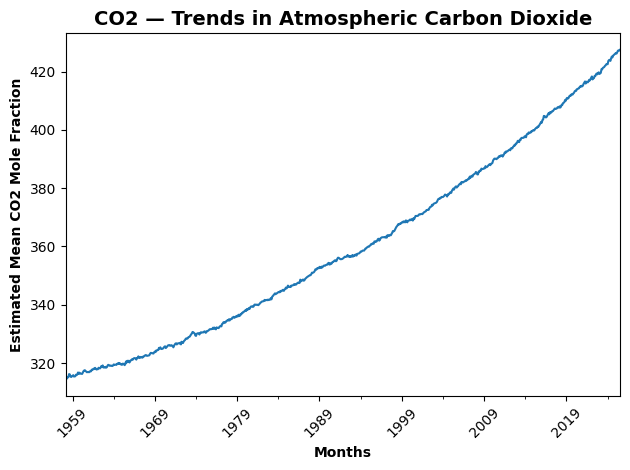

In [14]:
# Create the plot
plt.figure(figsize=(10, 6))
co2_df.plot(x='Date', y='Interpolated', legend=False)
plt.title('CO2 — Trends in Atmospheric Carbon Dioxide', fontsize=14, fontweight='bold')
plt.xlabel('Months', fontweight='bold')
plt.ylabel('Estimated Mean CO2 Mole Fraction', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It is notable there is upwards trend, but we are not able to see patters of seasonality in detail since we have a lot of months within the dataset. 

Although we could plot a few years from the dataset to study seasonality, we will conduct the Kruskal-Wallis instead by groupping the observations by years.

In [15]:
# Extract the year from each observation
co2_df['Year'] = co2_df['Date'].dt.year

# Prepare data for the test: split the numerical variable by group
grouped_data = [group['Interpolated'] for name, group in co2_df.groupby('Year')]

# Perform the Kruskal-Wallis test
h_statistic, p_value = kruskal(*grouped_data)
h_statistic, p_value

(np.float64(807.7063561466238), np.float64(1.4777741349041362e-127))

As [Avijit Bhattacharjee](https://www.linkedin.com/in/avijit-bhattacharjee-61b5a3192/) explains, "the Kruskal-Wallis test provides evidence of seasonality since the p-value associated with the test statistic is below the chosen significance level. A low p-value suggests that there are significant differences between the groups, warranting the existence of seasonality."

### **e) For subtle effects that are not visually obvious**

With many groups or large sample sizes, differences in medians can be small and visually ambiguous on a plot. We have seen this in the last example, when we had more than 50 fifty years to analyze.